# <font color=blue> Sentiment Analysis on a Restaurant Review dataset<font color>

### <font color=blue>IMPORTING LIBRARIES<font color=blue>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

### <font color=blue>LOADING DATASET<font color=blue>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SahilSh07/Sentiment-Analysis-on-Restaurant-Review-Dataset/main/Restaurant_Reviews.tsv",
                delimiter="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.shape

(1000, 2)

In [4]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df.Liked.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Liked, dtype: float64

In [8]:
df.groupby(['Liked']).size()

Liked
0    500
1    500
dtype: int64

In [9]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [10]:
df['Review'][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

### * **<font color=blue>Removing Punctuations<font color=blue>**
### * **<font color=blue>Removing Stopwords<font color=blue>**
### * **<font color=blue>Lowercasing<font color=blue>**
### * **<font color=blue>Tokenization<font color=blue>**
### * **<font color=blue>Stemming<font color=blue>**


In [11]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [12]:
review_restaurant = []
for i in range(1000):
    review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review = " ".join(review)
    #print(review)
    review_restaurant.append(review)

In [13]:
type(review)

str

In [14]:
review_restaurant

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [15]:
review_rest = pd.DataFrame(review_restaurant)
review_rest.head()

,0
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [16]:
review_rest.columns = ['Review_new']
review_rest.head()

,Review_new
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


# <font color = blue> COUNT VECTORIZER <font color>

In [17]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(review_restaurant).toarray()
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
X.shape

(1000, 1500)

In [19]:
cv.get_feature_names()

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [20]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [21]:
y = df.iloc[:,1]
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

### <font color = blue> TRAIN TEST SPLIT <font color>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

### <font color=blue> Gaussian Naive Bayes<font color>

In [24]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[55, 42],
       [12, 91]], dtype=int64)

In [27]:
accuracy_score(y_test, y_pred)

0.73

* **Accuracy score came out to be 73% in case of GaussianNB for Count Vectorizer**

In [28]:
Review = "nice service"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [29]:
Review = "long wait time"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


### <font color =blue>LOGISTIC REGRESSION and HYPER TUNING<font color>

In [30]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(penalty='l2', C=c, max_iter=7600, random_state=42)
    lr.fit(X_train, y_train)
    print("Accuracy for C=%s: %s" %
          (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.715
Accuracy for C=0.05: 0.725
Accuracy for C=0.25: 0.745
Accuracy for C=0.5: 0.72
Accuracy for C=1: 0.71


In [31]:
final_model = LogisticRegression(penalty='l2', C=0.25, max_iter=7600, random_state=42)
final_model.fit(X_train, y_train)
final_model

LogisticRegression(C=0.25, max_iter=7600, random_state=42)

In [32]:
accuracy_score(y_test, final_model.predict(X_test))

0.745

In [33]:
features_to_coef = {
    word: coef for word, coef in zip(cv.get_feature_names(), final_model.coef_[0])
}

print("POSITIVE")
for best_positive in sorted(features_to_coef.items(),
                           key= lambda x : x[1],
                           reverse=True)[:5]:
    print(best_positive)
    
print("PNEGATIVE")
for best_negative in sorted(features_to_coef.items(),
                           key= lambda x : x[1])[:5]:
    print(best_negative)

POSITIVE
('great', 1.7373295779748397)
('delici', 1.1353663910834446)
('love', 1.0363912320848856)
('good', 0.9859445040286019)
('amaz', 0.9333275954650538)
PNEGATIVE
('bad', -0.7074279189036066)
('worst', -0.6655571092837114)
('minut', -0.6496918696866013)
('would', -0.6096031538246764)
('terribl', -0.5779317580663517)


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
y_pred_lr = final_model.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred_lr)

array([[83, 14],
       [37, 66]], dtype=int64)

In [36]:
accuracy_score(y_test, y_pred_lr)

0.745

* **For Logistic Regression we can see the model accuracy increased to 75% for Count Vectorizer**

In [37]:
Review = "nice service"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [38]:
Review = "long wait time"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


### <font color=blue>Classification Report<font color> 

In [39]:
target_names = ['Positive', 'Negative']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.69      0.86      0.76        97
    Negative       0.82      0.64      0.72       103

    accuracy                           0.74       200
   macro avg       0.76      0.75      0.74       200
weighted avg       0.76      0.74      0.74       200



### <font color = blue>ROC AUC Curve<font color>

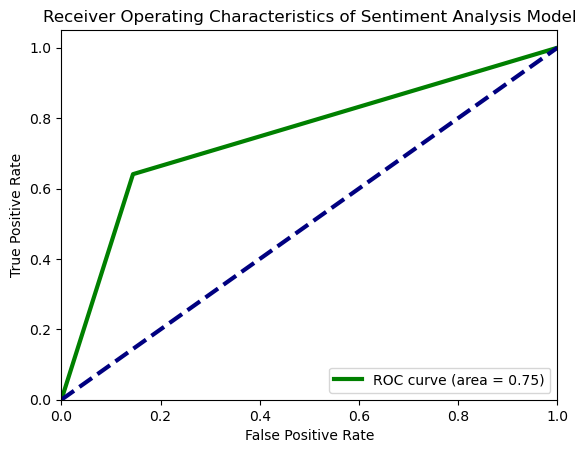

In [40]:
rocAuc = roc_auc_score(y_test, y_pred_lr)
falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_pred_lr)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
        lw=3, label="ROC curve (area = %0.2f)" %rocAuc)
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics of Sentiment Analysis Model")
plt.legend(loc="lower right")
plt.show()

### <font color=blue>CONFUSION MATRIX<font color>

In [41]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[83, 14],
       [37, 66]], dtype=int64)

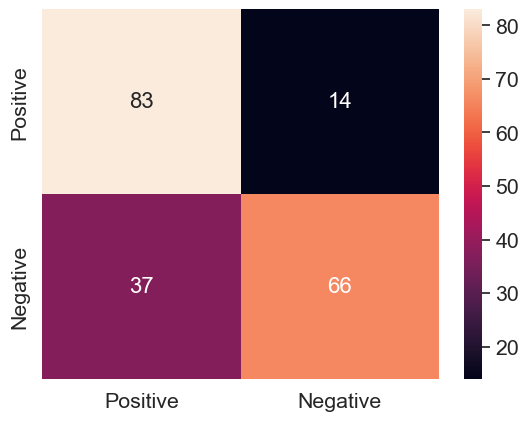

In [42]:
sns.set(font_scale=1.4) # for label size
x_axis_labels = y_axis_labels = target_names
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g',
           xticklabels=x_axis_labels,
           yticklabels=y_axis_labels)
plt.show()

# <font color=blue> TF-IDF ( TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY ) <font color>

In [43]:
review_rest.head()

,Review_new
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [44]:
review_rest.shape

(1000, 1)

In [45]:
y.shape

(1000,)

In [46]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(review_rest['Review_new'])
print(tfidf.vocabulary_)
print(tfidf.idf_)

{'wow': 1547, 'love': 802, 'place': 1028, 'crust': 324, 'good': 594, 'tasti': 1362, 'textur': 1374, 'nasti': 900, 'stop': 1311, 'late': 762, 'may': 834, 'bank': 92, 'holiday': 667, 'rick': 1149, 'steve': 1304, 'recommend': 1115, 'select': 1205, 'menu': 852, 'great': 608, 'price': 1062, 'get': 578, 'angri': 33, 'want': 1497, 'damn': 333, 'pho': 1016, 'honeslti': 670, 'tast': 1360, 'fresh': 553, 'potato': 1054, 'like': 785, 'rubber': 1163, 'could': 297, 'tell': 1367, 'made': 813, 'ahead': 15, 'time': 1396, 'kept': 745, 'warmer': 1499, 'fri': 554, 'touch': 1414, 'servic': 1214, 'prompt': 1074, 'would': 1545, 'go': 588, 'back': 83, 'cashier': 213, 'care': 205, 'ever': 461, 'say': 1190, 'still': 1306, 'end': 445, 'wayyy': 1507, 'overpr': 967, 'tri': 1424, 'cape': 201, 'cod': 259, 'ravoli': 1105, 'chicken': 236, 'cranberri': 310, 'mmmm': 872, 'disgust': 384, 'pretti': 1061, 'sure': 1346, 'human': 687, 'hair': 628, 'shock': 1223, 'sign': 1234, 'indic': 709, 'cash': 211, 'highli': 660, 'waitre

In [47]:
X = X.toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
X.shape

(1000, 1565)

### <font color = blue>TRAIN TEST SPLIT<font color>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1565), (200, 1565), (800,), (200,))

### <font color=blue> Gaussian Naive Bayes<font color>

In [51]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[57, 40],
       [16, 87]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.72

* **Accuracy score came out to be 72% in case of GaussianNB for TF-IDF**

In [55]:
Review = "nice service"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [56]:
Review = "long wait time"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


### <font color =blue>LOGISTIC REGRESSION and HYPER TUNING<font color>

In [57]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(penalty='l2', C=c, max_iter=7600, random_state=42)
    lr.fit(X_train, y_train)
    print("Accuracy for C=%s: %s" %
          (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.62
Accuracy for C=0.05: 0.73
Accuracy for C=0.25: 0.75
Accuracy for C=0.5: 0.75
Accuracy for C=1: 0.755


In [58]:
final_model = LogisticRegression(penalty='l2', C=1, max_iter=7600, random_state=42)
final_model.fit(X_train, y_train)
final_model

LogisticRegression(C=1, max_iter=7600, random_state=42)

In [59]:
accuracy_score(y_test, final_model.predict(X_test))

0.755

In [60]:
features_to_coef = {
    word: coef for word, coef in zip(tfidf.get_feature_names(), final_model.coef_[0])
}

print("POSITIVE")
for best_positive in sorted(features_to_coef.items(),
                           key= lambda x : x[1],
                           reverse=True)[:5]:
    print(best_positive)
    
print("NEGATIVE")
for best_negative in sorted(features_to_coef.items(),
                           key= lambda x : x[1])[:5]:
    print(best_negative)

POSITIVE
('great', 3.3942835613497397)
('delici', 2.1065600290260322)
('love', 2.0624986529674803)
('good', 1.833062968924548)
('amaz', 1.83137440447037)
NEGATIVE
('bad', -1.392247244001017)
('worst', -1.2924403710212593)
('would', -1.286308879126651)
('terribl', -1.2699875078992828)
('minut', -1.2296055945904585)


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
y_pred_lr = final_model.predict(X_test)

In [62]:
confusion_matrix(y_test, y_pred_lr)

array([[85, 12],
       [37, 66]], dtype=int64)

In [63]:
accuracy_score(y_test, y_pred_lr)

0.755

* **For Logistic Regression we can see the model accuracy increased to 76% for Count Vectorizer**

In [64]:
Review = "nice service"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [65]:
Review = "long wait time"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


### <font color=blue>Classification Report<font color> 

In [66]:
target_names = ['Positive', 'Negative']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.70      0.88      0.78        97
    Negative       0.85      0.64      0.73       103

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200



### <font color=blue>ROC AUC Curve<font color> 

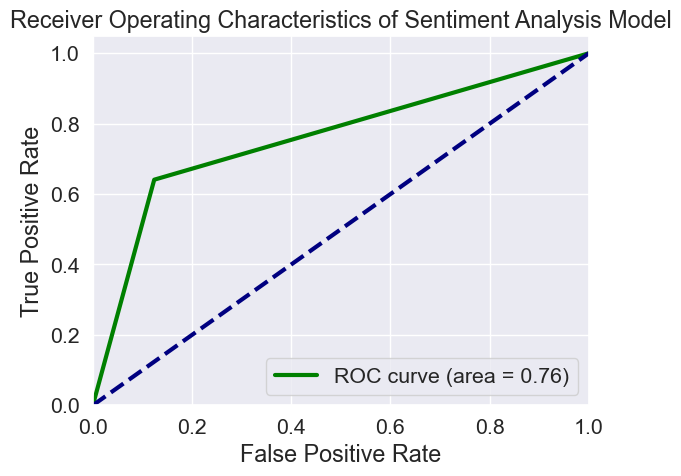

In [67]:
rocAuc = roc_auc_score(y_test, y_pred_lr)
falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_pred_lr)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
        lw=3, label="ROC curve (area = %0.2f)" %rocAuc)
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics of Sentiment Analysis Model")
plt.legend(loc="lower right")
plt.show()

### <font color=blue>CONFUSION MATRIX<font color> 

In [68]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [69]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[85, 12],
       [37, 66]], dtype=int64)

In [70]:
target_names

['Positive', 'Negative']

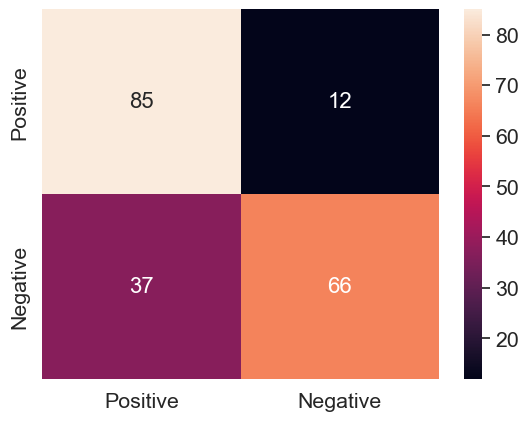

In [71]:
sns.set(font_scale=1.4) 
x_axis_labels = y_axis_labels = target_names
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g',
           xticklabels=x_axis_labels,
           yticklabels=y_axis_labels)
plt.show()